### Work and Health
1. Importing the data
* Functions to filter & clean the data
2. data exploration
    1. basic exploration
    2. statistical exploration
    3. visual exploration

In [1]:
#Import the basic libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Import diseases data

In [2]:
df_diseases_1 = pd.read_csv('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Diseases_GHDx_2/IHME-GBD_2019_DATA-16b07a3d-1/IHME-GBD_2019_DATA-16b07a3d-1.csv')
df_diseases_2 = pd.read_csv('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Diseases_GHDx_2/IHME-GBD_2019_DATA-16b07a3d-2/IHME-GBD_2019_DATA-16b07a3d-2.csv')
df_diseases = df_diseases_1.append(df_diseases_2).reset_index()
df_diseases.drop(columns = 'index', inplace = True)

### Function to filter usefull disease data

In [3]:
#data cleaning - function that receives year of analysis, gender, metric and measure. Returns the "cleaned" df

def get_df_dis(df,year,gender,metric,measure):
    
    year = int(year)
    
    #drop redundant columns (code for each feature, mainly)
    df.copy().drop(columns=['measure_id','location_id','measure_name','sex_id','age_id','age_name','cause_id','metric_id'\
                         ,'upper','lower'], inplace=True)
    
    #filter by gender and year (Male or Female)
    df = df.loc[df_diseases['sex_name'].isin([gender])]\
.loc[df_diseases['year'] == year].drop(columns=['sex_name','year']).copy()
    
    #filter by metric (Number, Percent or Rate)
    df = df.loc[df.metric_name == metric].copy()
    df.drop(columns = ['metric_name'],inplace = True)
    
    #filter by measure (Incidence or Prevalence)
    df = df.loc[df.measure_name == measure].copy()
    df.drop(columns = ['measure_name'],inplace = True)
    
    #pivoting table with disease names = columns
    df = df.copy().pivot(index='location_name', columns = 'cause_name', values = 'val')
    
    return df

### Import health cost data

In [4]:
df_health_cost = pd.read_excel('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Health_expenditure_WB/Health_expenditure_WB.xls',na_values='..')

### Function to filter usefull HC data

In [5]:
def get_df_hc(df,year):
    
    #transform column names into more readable names
    new_col = list(df.columns)[0:4]
    for col in list(df.columns)[4::]:
        new_col.append(col.split(' ')[0])
    
    #reassign years as new columns
    df.set_axis(new_col, axis=1, inplace=True)
        
    # remove unnecessary years
    df = df[['Series Code','Country Name',year]].copy()
    
    #pivoting the table 
    df = df.copy().pivot(index='Country Name', columns = 'Series Code', values = year)
    
    #rename series columns for more readability
    df.rename(columns={'SH.XPD.GHED.PP.CD':'Public_cost','SH.XPD.PVTD.PP.CD':'Private_cost'}, inplace=True)
    
    #rename index axis for further merging
    df = df.rename_axis('location_name')
    
    return df

### Import GDP p/capita data

In [6]:
df_gdp = pd.read_excel('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/GPD_WB/GPD_CAPITA_WB.xlsx',na_values='..')

### Function to filter usefull GDP data

In [7]:
def get_gdp(df,year):
    
    #transform column names into more readable names
    new_col = list(df.columns)[0:4]
    for col in list(df.columns)[4::]:
        new_col.append(col.split(' ')[0])
    
    #reassign years as new columns
    df.set_axis(new_col, axis=1, inplace=True)
        
    # remove unnecessary years
    df = df[['Series Code','Country Name',year]].copy()
    
    #pivoting the table 
    df = df.copy().pivot(index='Country Name', columns = 'Series Code', values = year)
    
    #rename series columns for more readability
    df.rename(columns={'NY.GDP.PCAP.CD':'GDP_per_cap'}, inplace=True)
    
    #rename index axis for further merging
    df = df.rename_axis('location_name')
    
    return df

### Import Employment data

In [8]:
df_employment = pd.read_excel('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Employment_WB_2/Employment_WB_2.xlsx',na_values='..')

### Function to filter usefull employment data

In [9]:
def get_employment(df,year):
    
    #transform column names into more readable names
    new_col = list(df.columns)[0:4]
    for col in list(df.columns)[4::]:
        new_col.append(col.split(' ')[0])
    
    #reassign years as new columns
    df.set_axis(new_col, axis=1, inplace=True)
        
    # remove unnecessary years
    df = df[['Series Code','Country Name',year]].copy()
    
    #pivoting the table 
    df = df.copy().pivot(index='Country Name', columns = 'Series Code', values = year)
    
    #rename columns for better readability
    df.rename(columns={'SL.AGR.EMPL.FE.ZS':'per_female_agriculture',\
                      'SL.AGR.EMPL.MA.ZS':'per_male_agriculture',\
                      'SL.AGR.EMPL.ZS':'per_total_agriculture',\
                      'SL.EMP.TOTL.SP.ZS':'per_total_employment',\
                      'SL.EMP.TOTL.SP.MA.ZS':'per_male_employment',\
                      'SL.EMP.TOTL.SP.FE.ZS':'per_female_employment',\
                      'SL.IND.EMPL.FE.ZS':'per_female_industry',\
                      'SL.IND.EMPL.MA.ZS':'per_male_industry',\
                      'SL.IND.EMPL.ZS':'per_total_industry',\
                      'SL.SRV.EMPL.FE.ZS':'per_female_services',\
                      'SL.SRV.EMPL.MA.ZS':'per_male_services',\
                      'SL.SRV.EMPL.ZS':'per_total_services'}, inplace=True)
    
    #rename index axis for further merging
    df = df.rename_axis('location_name')
    
    return df

### Merging all, considering all genders & yr = 2009

In [10]:
df1 = get_df_dis(df_diseases,'2009','Both','Rate','Incidence')
df2 = get_df_hc(df_health_cost,'2009')
df3 = get_gdp(df_gdp,'2009')
df4 = get_employment(df_employment,'2009')

df5 = pd.merge(df1,df2, on='location_name', how='inner')
df6 = pd.merge(df5,df3, on='location_name', how='inner')
df7 = pd.merge(df6,df4, on='location_name', how='inner')

#remove gender related columns:
col_remove = ['per_female_agriculture','per_male_agriculture','per_male_employment','per_female_employment',\
             'per_female_industry','per_male_industry','per_female_services','per_male_services']
complete = df7.drop(columns = col_remove)

### Basic statistical analysis

In [12]:
complete.describe()

,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost,GDP_per_cap,per_total_agriculture,per_total_employment,per_total_industry,per_total_services
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,164.000000,164.000000,171.000000,158.000000,158.000000,158.000000,158.000000
mean,624.782236,55.121595,3867.494052,4676.904522,10311.366487,3883.235445,133.429291,759.115707,367.749762,14224.064739,28.787658,57.375759,19.526203,51.687342
std,124.989804,16.892747,1265.642952,789.922120,1546.756967,1241.087725,68.992856,1027.646976,479.767382,21984.211002,24.031788,11.745858,8.530746,18.731631
min,334.075556,17.427971,1225.377490,2795.506644,6572.752637,1941.034362,53.135734,4.098026,2.774991,212.136880,0.110000,34.389999,2.130000,8.410000
25%,529.018743,46.650171,2917.756676,4358.616348,9279.991172,2822.534585,87.731514,74.943953,80.469677,1368.596276,6.835000,49.532500,13.942500,36.505000
50%,625.437997,54.815924,3692.785828,4756.381267,9968.708235,3822.570477,117.616933,293.901901,217.951370,4714.702495,23.355000,57.265001,19.895000,54.130001
75%,696.301721,64.838742,4678.670512,5186.244693,12018.095730,4826.657601,149.739856,946.138855,498.757332,15340.275410,46.174999,64.354998,25.007500,67.030001
max,1117.506424,111.769667,8259.280389,6404.629094,13462.691108,6497.733111,429.546598,5282.389648,3665.752686,154762.199427,88.680000,85.480003,58.450001,85.739998


In [29]:
complete.skew()

Anxiety disorders            0.531945
Bipolar disorder             0.153592
Depressive disorders         0.629286
Dermatitis                  -0.404838
Headache disorders           0.085927
Musculoskeletal disorders    0.242787
Stroke                       1.797327
Public_cost                  1.815113
Private_cost                 4.129686
GDP_per_cap                  2.945391
per_total_agriculture        0.632093
per_total_employment         0.297543
per_total_industry           0.423198
per_total_services          -0.293063
dtype: float64

In [30]:
complete.kurt()

Anxiety disorders             0.819954
Bipolar disorder              0.065800
Depressive disorders          0.476525
Dermatitis                   -0.321840
Headache disorders           -0.852850
Musculoskeletal disorders    -0.934694
Stroke                        3.428166
Public_cost                   2.888860
Private_cost                 24.537669
GDP_per_cap                  11.866605
per_total_agriculture        -0.747826
per_total_employment         -0.359834
per_total_industry            1.649006
per_total_services           -0.894226
dtype: float64

### Visual Exploration

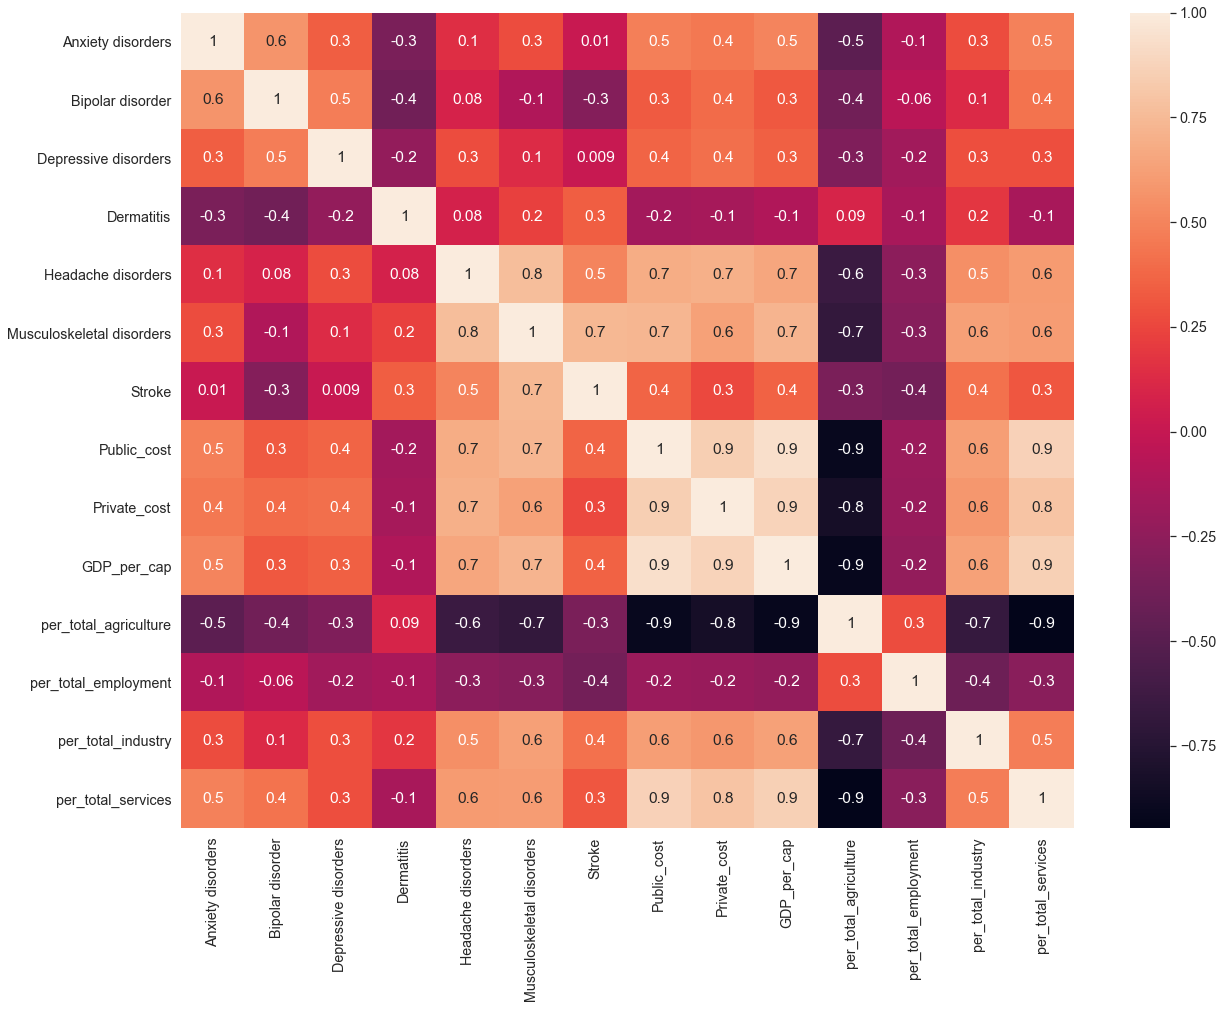

In [49]:
#correlation map
sns.set(font_scale=1.3)
df_corr = complete.corr(method = 'spearman')
figure = plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, fmt = '.1g') 
plt.show()

* __per_total_agriculture__ (% of people out of the employed people that work in agriculture) seems to be negatively correlated with all the features. It is also strongly negatively (-0.9) correlated to __per_total_services, GDP_per_cap and Public Cost__ --> meaning that we probably should pick one pf them to include in a cluster analysis (check below subplots)

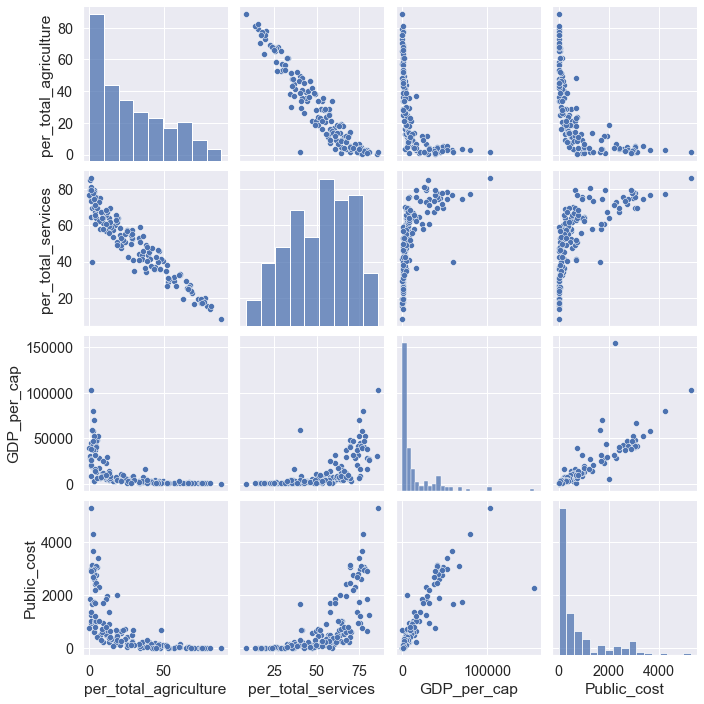

In [50]:
sns.pairplot(complete[['per_total_agriculture','per_total_services','GDP_per_cap','Public_cost']])
plt.show()

### Missing Values

In [16]:
#missing values (% of total):
complete.isna().sum()/1.74

Anxiety disorders            0.000000
Bipolar disorder             0.000000
Depressive disorders         0.000000
Dermatitis                   0.000000
Headache disorders           0.000000
Musculoskeletal disorders    0.000000
Stroke                       0.000000
Public_cost                  5.747126
Private_cost                 5.747126
GDP_per_cap                  1.724138
per_total_agriculture        9.195402
per_total_employment         9.195402
per_total_industry           9.195402
per_total_services           9.195402
dtype: float64

In [27]:
complete_no_na = complete.dropna()

In [31]:
complete_no_na.info()
#data size is 87% the size of the original

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Afghanistan to Zambia
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Anxiety disorders          151 non-null    float64
 1   Bipolar disorder           151 non-null    float64
 2   Depressive disorders       151 non-null    float64
 3   Dermatitis                 151 non-null    float64
 4   Headache disorders         151 non-null    float64
 5   Musculoskeletal disorders  151 non-null    float64
 6   Stroke                     151 non-null    float64
 7   Public_cost                151 non-null    float64
 8   Private_cost               151 non-null    float64
 9   GDP_per_cap                151 non-null    float64
 10  per_total_agriculture      151 non-null    float64
 11  per_total_employment       151 non-null    float64
 12  per_total_industry         151 non-null    float64
 13  per_total_services         151 non-null   

### Using Gradient Boosting to fill in NA's

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
def predict_missing(df, evaluated_column):
    """ Predicts and updates the missing values for the different features. """
    
    # defines the missing features
    cols = ['Public_cost','Private_cost', 'GDP_per_cap','per_total_agriculture','per_total_employment',\
            'per_total_industry','per_total_services']
    
    # removes the evaluated feature
    cols.remove(evaluated_column)
    
    # defines the data to be used using the gradiant boosting method
    gb_data = df.select_dtypes(exclude=['object']).drop(columns = cols)
    
    # divides the data in missing and complete values
    feature_na = gb_data.loc[gb_data[evaluated_column].isna()]
    feature = gb_data.loc[~gb_data[evaluated_column].isna()]
    
    # defines the training data
    x_train = feature.drop(columns = evaluated_column)
    y_train = feature.copy().pop(evaluated_column)
    
    # fits the model
    gb = GradientBoostingRegressor(n_estimators=100)
    gb.fit(x_train, y_train)
    
    # predicts missing values
    x_predict = feature_na.drop(columns = evaluated_column)
    pred = pd.DataFrame(gb.predict(x_predict), index=x_predict.index, columns=[f'{evaluated_column}_na'])
    
    # fills the na values
    df = df.merge(pred, left_index=True, right_index=True, how='left')
    df.loc[df[evaluated_column].isna(), evaluated_column] = df[f'{evaluated_column}_na']
    df.drop(columns = [f'{evaluated_column}_na'], inplace=True)
    
    return df

In [34]:
complete_gb = (
    complete
    .pipe(predict_missing, 'Public_cost')
    .pipe(predict_missing, 'Private_cost')
    .pipe(predict_missing, 'GDP_per_cap')
    .pipe(predict_missing, 'per_total_agriculture')
    .pipe(predict_missing, 'per_total_employment')
    .pipe(predict_missing, 'per_total_industry')
    .pipe(predict_missing, 'per_total_services')
)

In [35]:
complete_gb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Zimbabwe
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Anxiety disorders          174 non-null    float64
 1   Bipolar disorder           174 non-null    float64
 2   Depressive disorders       174 non-null    float64
 3   Dermatitis                 174 non-null    float64
 4   Headache disorders         174 non-null    float64
 5   Musculoskeletal disorders  174 non-null    float64
 6   Stroke                     174 non-null    float64
 7   Public_cost                174 non-null    float64
 8   Private_cost               174 non-null    float64
 9   GDP_per_cap                174 non-null    float64
 10  per_total_agriculture      174 non-null    float64
 11  per_total_employment       174 non-null    float64
 12  per_total_industry         174 non-null    float64
 13  per_total_services         174 non-null 

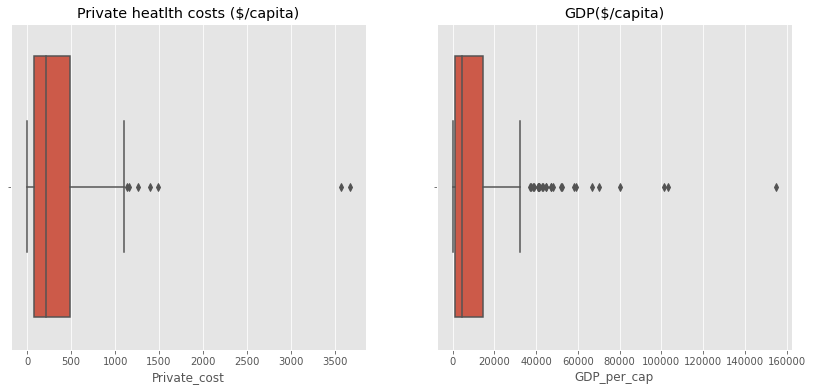

In [41]:
# check distribution of feature with highest kurtosis/skewness
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = axes[0], data = complete_gb, x = 'Private_cost').set(title='Private heatlth costs ($/capita)') 
sns.boxplot(ax = axes[1], data = complete_gb, x = 'GDP_per_cap').set(title='GDP($/capita)')
plt.show()

In [38]:
complete.loc[complete.Private_cost > 3500]

,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost,GDP_per_cap,per_total_agriculture,per_total_employment,per_total_industry,per_total_services
location_name,,,,,,,,,,,,,,
Liberia,542.636584,49.553481,4160.953334,4758.481181,9311.819361,2348.552841,73.778566,685.321594,3571.484619,470.947620,47.959999,73.849998,10.770000,41.270000
Switzerland,830.719140,63.446000,4701.922288,3259.906917,12046.861016,5667.745162,118.497758,1736.888062,3665.752686,69927.468758,3.250000,65.470001,22.139999,74.610001


In [42]:
complete_no = complete_gb.drop(complete_gb[complete_gb['Private_cost'] > 3500].index)

In [43]:
complete_gb.loc[complete_gb.GDP_per_cap > 100000]

,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost,GDP_per_cap,per_total_agriculture,per_total_employment,per_total_industry,per_total_services
location_name,,,,,,,,,,,,,,
Bermuda,655.565405,70.648567,4278.952121,5608.568502,9859.997991,4738.493877,121.183283,1238.435326,639.284216,101407.764032,3.445241,52.992881,19.643924,76.242344
Luxembourg,737.412473,61.526002,3917.738037,3293.347137,12282.825490,4902.492556,108.256653,5282.389648,809.291931,103198.669313,1.360000,54.340000,12.910000,85.739998
Monaco,681.938988,59.856304,5576.173113,3116.008540,11902.629783,5539.405743,190.492856,2266.853271,520.119812,154762.199427,5.284226,54.061761,22.977875,74.625453


In [44]:
complete_no.drop(complete_gb[complete_gb['GDP_per_cap'] > 100000].index,inplace = True)

### Re-evaluate statistics

In [45]:
complete_no.skew()

Anxiety disorders            0.560816
Bipolar disorder             0.178808
Depressive disorders         0.663813
Dermatitis                  -0.410749
Headache disorders           0.107077
Musculoskeletal disorders    0.282146
Stroke                       1.784059
Public_cost                  1.724048
Private_cost                 1.389742
GDP_per_cap                  1.821104
per_total_agriculture        0.669270
per_total_employment         0.350633
per_total_industry           0.417843
per_total_services          -0.330391
dtype: float64

In [46]:
complete_no.kurt()

Anxiety disorders            0.886399
Bipolar disorder             0.030210
Depressive disorders         0.495160
Dermatitis                  -0.208845
Headache disorders          -0.829345
Musculoskeletal disorders   -0.876192
Stroke                       3.327001
Public_cost                  2.056046
Private_cost                 1.686405
GDP_per_cap                  2.746635
per_total_agriculture       -0.650937
per_total_employment        -0.142428
per_total_industry           1.866136
per_total_services          -0.864214
dtype: float64

In [47]:
complete_no

,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost,GDP_per_cap,per_total_agriculture,per_total_employment,per_total_industry,per_total_services
location_name,,,,,,,,,,,,,,
Afghanistan,762.414599,67.921161,4466.424098,3861.546978,8989.899945,2535.754823,99.293891,7.680923,103.188835,438.076034,56.889999,42.349998,13.630000,29.480000
Albania,576.466356,47.725357,2400.784642,5250.422533,12110.329224,5427.605160,177.752731,202.939850,188.257721,4114.140114,44.049999,47.070000,19.940001,36.009998
Algeria,747.645185,67.870360,4594.902026,4633.739032,9803.305682,3741.163294,124.014304,467.185333,191.505280,3883.132425,13.030000,37.820000,29.570000,57.400002
American Samoa,641.647335,25.710003,1878.635063,4894.181427,9141.570681,4456.690706,138.261590,206.748555,38.861773,11961.258226,34.626450,47.505169,20.072476,40.404259
Andorra,748.734923,59.960306,4517.494282,3382.229237,12635.530780,5148.441612,98.364105,1884.315308,840.804810,43503.185516,1.344990,56.231559,22.992218,75.364297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,709.834814,77.816720,3433.812869,3280.041734,10384.526414,3976.257334,164.374550,791.993225,542.296631,9451.932449,10.950000,60.680000,20.959999,68.089996
Uzbekistan,355.022965,48.056571,2892.506584,4937.293078,12004.228417,3208.556851,123.102858,119.411751,162.179382,1213.265328,28.090000,59.599998,22.480000,49.439999
Vanuatu,631.226928,25.494388,2309.873113,4657.797002,8933.266914,4075.188844,170.774889,56.090603,11.152098,2649.618144,60.549999,66.320000,7.030000,32.419998
